In [3]:
import torch
from UNET import UNET

In [8]:
model = UNET(1, 1)
PATH = 'C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_first.pth'
model.load_state_dict(torch.load(PATH))
model.eval()

UNET(
  (max_pool2D): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down_conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (down_conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (down_conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(

In [9]:
from data_loading import lungCT_segmentation_DATA
from torch.utils.data import DataLoader
import numpy as np
lung_CT = np.load('D:/DATA/VESSEL_DATA/middle_lung.npy')
train = lungCT_segmentation_DATA(lung_CT, 'train')
val = lungCT_segmentation_DATA(lung_CT, 'val')
train_loader = DataLoader(train, batch_size = 1, shuffle = True)
val_loader = DataLoader(val, batch_size = 1, shuffle = True)

100%|██████████| 158/158 [00:00<?, ?it/s]


In [10]:
img = -1
mask = -1
for im, ms in val_loader:
    img = im
    mask = ms
    break
print(img.size())
print(mask.size())

torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 512, 512])


In [11]:
img_out = img.numpy().reshape(512, 512)
mask_out = mask.numpy().reshape(512, 512)
preds = model(img)
preds_out = preds.detach().numpy().reshape(512, 512)

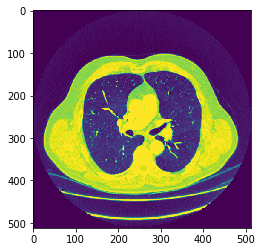

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img_out)

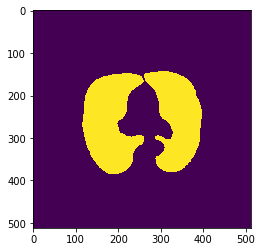

In [13]:
plt.imshow(mask_out)

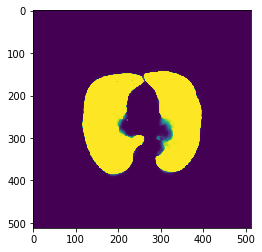

In [14]:
plt.imshow(preds_out)

In [15]:
test = lungCT_segmentation_DATA(lung_CT, 'test')
test_loader = DataLoader(test, batch_size = 1, shuffle = True)

100%|██████████| 158/158 [00:00<?, ?it/s]


In [16]:
img_test = -1
mask_test = -1
for img, mask in test_loader:
    img_test = img
    mask_test = mask
    break

In [17]:
img_out_test = img_test.numpy().reshape(512, 512)
mask_out_test = mask_test.numpy().reshape(512, 512)
preds_test = model(img_test)
preds_out_test = preds_test.detach().numpy().reshape(512, 512)

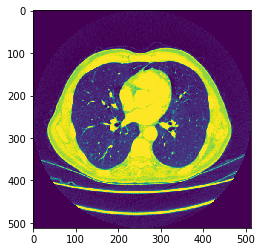

In [18]:
plt.imshow(img_out_test)

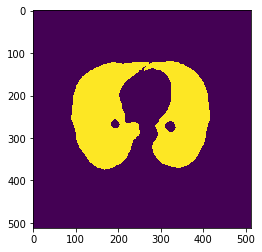

In [19]:
plt.imshow(mask_out_test)

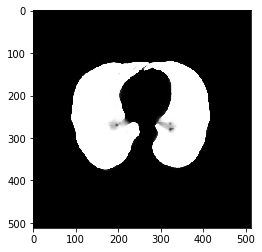

In [20]:
plt.imshow(preds_out_test, cmap = 'gray')

In [21]:
arr1 = np.array([0, 1, 2, 3, 4])
arr2 = np.array([1, 2, 3, 4, 5])
np.logical_and(arr1, arr2)

array([False,  True,  True,  True,  True])

In [22]:
np.logical_or(arr1, arr2)

array([ True,  True,  True,  True,  True])

In [58]:
def iou(target, prediction):
    # Target and prediction as torch tensors of size (batch size, channels, width, height)
    shape = target.size()[2]
    target_batch = np.squeeze(target.detach().numpy(), 1)
    prediction_batch = np.squeeze(prediction.detach().numpy(), 1) # (batch size, width, height)
    ious = []
    for i in range(target_batch.shape[0]):
        target_np = target_batch[i, :, :] # (512, 512)
        prediction_np = prediction_batch[i, :, :] # (512, 512)
        intersection = np.logical_and(target_np, prediction_np)
        union = np.logical_or(target_np, prediction_np)
        iou_score = np.sum(intersection) / np.sum(union)
        ious.append(iou_score)
    return sum(ious)

In [63]:
sum(iou(mask, img))

0.259578635461919

In [19]:
import time
a = "UNET_model_" + time.strftime("%D") + "_%s" % (str(.1))
a

'UNET_model_08/12/20_0.1'

In [20]:
import numpy as np
arr1 = np.array([[0, 1], 
                 [1, 1]])
arr2 = np.array([[.1, 1], 
                 [0, 1]])
intersection = np.logical_and(arr1, arr2)
union = np.logical_or(arr1, arr2)
intersection

array([[False,  True],
       [False,  True]])

In [21]:
np.sum(intersection) / np.sum(union)

0.5

In [22]:
intersection2 = np.sum(arr1*arr2)
union2 = np.sum(arr1) + np.sum(arr2) - intersection2
intersection2/union2

0.6451612903225807

In [23]:
total_pix = 8
2*np.sum(intersection)/total_pix

0.5

In [26]:
arr = np.array([[0, 1], [1, 0]])
arr

array([[0, 1],
       [1, 0]])

In [27]:
1-arr

array([[1, 0],
       [0, 1]])

In [28]:
def iou_numpy(target_npy, pred_npy):
    # (n, n) dim, rounded
    
    # Object iou
    intersection_obj = np.sum(target_npy * pred_npy)
    union_obj = np.sum(target_npy) + np.sum(pred_npy) - intersection_obj
    iou_obj = intersection_obj / union_obj
    # Background obj
    target_back = 1 - target_npy
    pred_back = 1 - pred_npy
    intersection_back = np.sum(target_back * pred_back)
    union_back = np.sum(target_back) + np.sum(pred_back) - intersection_back
    iou_back = intersection_back / union_back
    
    iou_total = (iou_obj + iou_back) / 2
    
    return iou_total

In [30]:
arr1 = np.array([[0, 0], 
                 [1, 1]])
arr2 = np.array([[0, 1], 
                 [1, 1]])
iou_numpy(arr1, arr2)

0.5833333333333333

In [ ]:
def iou_compute(target_batch, pred_batch):
    target = np.squeeze(target_batch.cpu().numpy(), 1)
    pred = np.squeeze(pred_batch.cpu().detach().numpy(), 1)
    ious = []
    for i in range(target.shape[0]):
        mask_real = target[i, :, :]
        mask_pred = pred[i, :, :]
        iou = iou_numpy(mask_real, mask_pred)
        ious.append(iou)
    return sum(ious)
    

In [1]:
import torch
model = torch.load('./GrayVGG16_FC_BN_epoch120_batchsize32.pth')

ModuleNotFoundError: No module named 'network_Gray_VGG'

In [ ]:
import torch
from UNET import UNET
from data_loading import lungCT_segmentation_DATA
from torch.utils.data import DataLoader
from model_utils import iou_compute, DiceLoss
import numpy as np

device = torch.device("cuda:0")

test = lungCT_segmentation_DATA(lung_CT, 'test')
test_loader = DataLoader(test, batch_size = 1, shuffle = True)

model = UNET(1, 1).to(device)
criterion = nn.BCELoss()
pred_images = []
loss_total = 0
iou_total = 0
model.eval()
for batch in tqdm(test_loader):
    img_batch, mask_batch = batch[0].to(device), batch[1].to(device)
    output = model(img_batch)
    pred_images.append(output.cpu().detach().numpy().reshape(512, 512))
    loss = criterion(output, mask_batch)
    loss_total += loss.item()
    iou = iou_compute(mask_batch, output)
    iou_total += iou

loss_total /= len(test_loader)
iou_total /= (batch_size * len(test_loader))

print("Test Loss: %s\tTest IOU: %s" % (loss_total, iou_total))
np.save('./BCELoss_test_preds', np.array(pred_images))

In [15]:
import numpy as np
pth1 = 'C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.973_BCE_08-13-20/BCELoss_test_preds.npy'
pth2 = 'C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.980_MSE_08-13-20/MSELoss_test_preds.npy'
pth3 = 'C:/Users/rrsoo/AdvancedStuff/Medical_AI/VESSEL12/Segmentation/Saved Models/UNET_0.981_Dice_08-12-20/DiceLoss_test_preds.npy'
arr1 = np.load(pth1)
arr2 = np.load(pth2)
arr3 = np.load(pth3)

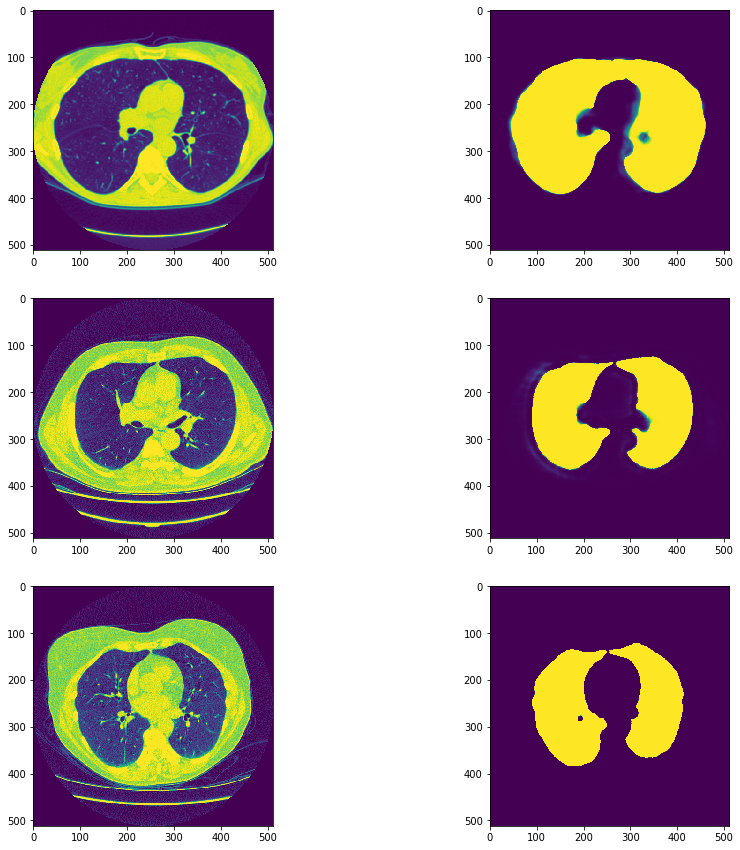

In [18]:
import matplotlib.pyplot as plt
idx = 0
img_bce = arr1[idx][0]
mask_bce = arr1[idx][1]

img_mse = arr2[idx][0]
mask_mse = arr2[idx][1]

img_dice = arr3[idx][0]
mask_dice = arr3[idx][1]

fig, ax = plt.subplots(3, 2, figsize = (15, 15))
ax[0, 0].imshow(img_bce)
ax[0, 1].imshow(mask_bce)

ax[1, 0].imshow(img_mse)
ax[1, 1].imshow(mask_mse)

ax[2, 0].imshow(img_dice)
ax[2, 1].imshow(mask_dice)